In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
data = pd.read_csv("winequality-red.csv", delimiter=";")
display(data.head(n=5))
print('The shape of our data is:', data.shape)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The shape of our data is: (1599, 12)


In [4]:
labels = np.array(data['quality'])
data_without_quality= data.drop('quality', axis = 1)
feature_list = list(data_without_quality.columns)
train_features, test_features, train_labels, test_labels = train_test_split(data_without_quality, labels, test_size = 0.25, random_state = 4)

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(n_estimators = 200)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)
errors = mean_squared_error(test_labels, predictions)
print('Mean Squared Error:', round(errors, 4))
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Mean Squared Error: 0.3218
Variable: alcohol              Importance: 0.26
Variable: volatile acidity     Importance: 0.14
Variable: sulphates            Importance: 0.14
Variable: total sulfur dioxide Importance: 0.08
Variable: residual sugar       Importance: 0.06
Variable: chlorides            Importance: 0.06
Variable: pH                   Importance: 0.06
Variable: fixed acidity        Importance: 0.05
Variable: citric acid          Importance: 0.05
Variable: free sulfur dioxide  Importance: 0.05
Variable: density              Importance: 0.05


In [4]:
from sklearn.ensemble import GradientBoostingRegressor
rf = GradientBoostingRegressor(random_state=0)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)
errors = mean_squared_error(test_labels, predictions)
print('Mean Squared Error:', round(errors, 4))
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Mean Squared Error: 0.3528
Variable: alcohol              Importance: 0.36
Variable: sulphates            Importance: 0.17
Variable: volatile acidity     Importance: 0.16
Variable: total sulfur dioxide Importance: 0.08
Variable: fixed acidity        Importance: 0.04
Variable: chlorides            Importance: 0.04
Variable: density              Importance: 0.04
Variable: pH                   Importance: 0.04
Variable: free sulfur dioxide  Importance: 0.03
Variable: citric acid          Importance: 0.02
Variable: residual sugar       Importance: 0.02


In [5]:
from sklearn.svm import SVR
rf = SVR(kernel='linear')
rf.fit(train_features, train_labels);
predictions = rf.predict(test_features)
errors = mean_squared_error(test_labels, predictions)
print('Mean Squared Error:', round(errors, 4))

Mean Squared Error: 0.4059


In [49]:
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_score
cluster_range = range( 2, 15 )
cluster_errors = []
score1 = []
data_scaled = data_without_quality.apply(zscore)
for num_clusters in cluster_range:
  clusters = KMeans( n_clusters=num_clusters)
  labels = clusters.fit_predict(data_scaled)
  score1.append(silhouette_score(data_scaled, labels))
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:13]

,num_clusters,cluster_errors
0,2,14330.119811
1,3,12629.974592
2,4,11294.210161
3,5,10155.374026
4,6,9361.278046
5,7,8645.257380
6,8,8304.868362
7,9,7969.617679
8,10,7731.794380
9,11,7439.782314


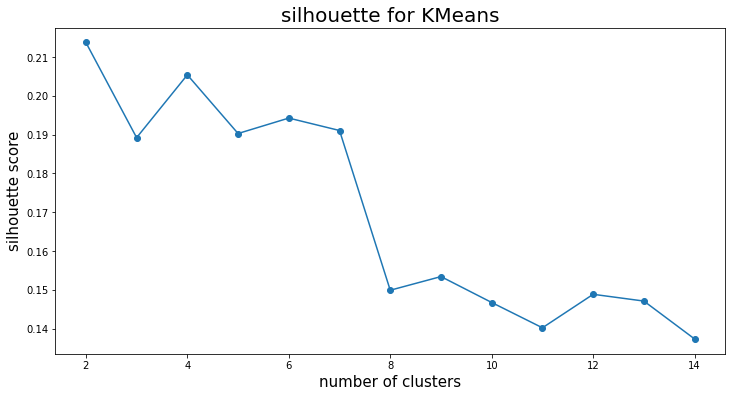

In [52]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('silhouette score', fontsize=15)
ax1.set_xlabel('number of clusters', fontsize=15)
ax1.set_title('silhouette for KMeans', fontsize=20)
plt.plot( clusters_df.num_clusters, score1, marker = "o" )

In [51]:
km = KMeans(n_clusters=4)
mean = []
MSE_arr = []
cluster_data = []
arr = []
cluster_map = pd.DataFrame()
predict = km.fit_predict(data_scaled)
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = pd.Series(predict, index=cluster_map['data_index'])
for i in range(4):
  mean.append(data.iloc[cluster_map[cluster_map.cluster == i]['data_index']]["quality"].mean())
  print("cluster " + str(i+1) + " mean: " + str(round(mean[i], 4)))
mean
for i in data.index:
  MSE_arr.append(pow(mean[cluster_map.iloc[i]['cluster']]-data.iloc[i]['quality'], 2))
mse = sum(MSE_arr) / len(MSE_arr)
print(mse)

cluster 1 mean: 6.0085
cluster 2 mean: 5.5512
cluster 3 mean: 5.3571
cluster 4 mean: 5.3545
0.5875521161765238


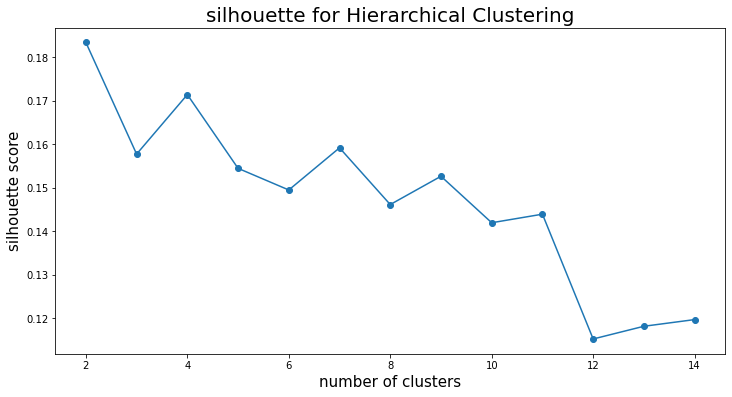

In [53]:
from sklearn.cluster import AgglomerativeClustering
cluster_range = range( 2, 15)
cluster_errors = []
score1 = []
data_scaled = data_without_quality.apply(zscore)
for num_clusters in cluster_range:
  clusters = AgglomerativeClustering( n_clusters=num_clusters)
  labels = clusters.fit_predict(data_scaled)
  score1.append(silhouette_score(data_scaled, labels))
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('silhouette score', fontsize=15)
ax1.set_xlabel('number of clusters', fontsize=15)
ax1.set_title('silhouette for Hierarchical Clustering', fontsize=20)
plt.plot( clusters_df.num_clusters, score1, marker = "o" )

In [26]:
km = AgglomerativeClustering(n_clusters=4)
mean = []
cluster_data = []
arr = []
cluster_map = pd.DataFrame()
predict = km.fit_predict(data_scaled)
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = pd.Series(predict, index=cluster_map['data_index'])
for i in range(4):
  mean.append(data.iloc[cluster_map[cluster_map.cluster == i]['data_index']]["quality"].mean())
  print("cluster " + str(i+1) + " mean: " + str(round(mean[i], 4)))
for i in data.index:
  MSE_arr.append(pow(mean[cluster_map.iloc[i]['cluster']]-data.iloc[i]['quality'], 2))
mse = sum(MSE_arr) / len(MSE_arr)
print(mse)

cluster 1 mean: 5.434
cluster 2 mean: 6.1195
cluster 3 mean: 5.466
cluster 4 mean: 5.3636
0.5422554338353441


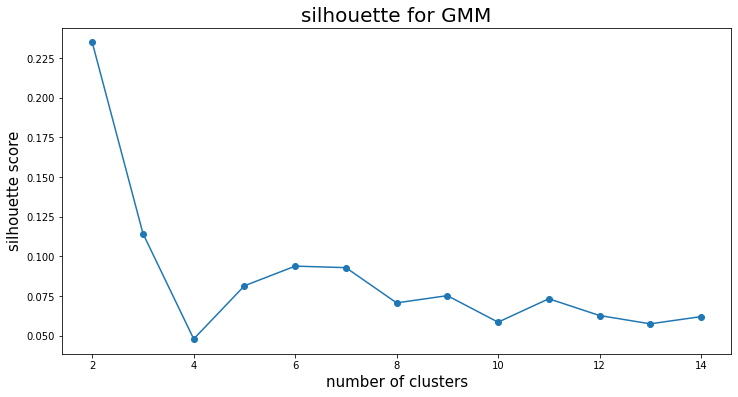

In [56]:
from sklearn.mixture import GaussianMixture
cluster_range = range( 2, 15 )
cluster_errors = []
score1 = []
for num_clusters in cluster_range:
  clusters = GaussianMixture(n_components=num_clusters)
  labels = clusters.fit_predict(data_scaled)
  score1.append(silhouette_score(data_scaled, labels))
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('silhouette score', fontsize=15)
ax1.set_xlabel('number of clusters', fontsize=15)
ax1.set_title('silhouette for GMM', fontsize= 20)
plt.plot( clusters_df.num_clusters, score1, marker = "o" )

In [58]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6).fit(data_scaled)
mean = []
cluster_data = []
arr = []
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = gmm.predict(data_scaled)
for i in range(6):
  mean.append(data.iloc[cluster_map[cluster_map.cluster == i]['data_index']]["quality"].mean())
  print("cluster " + str(i+1) + " mean: " + str(round(mean[i], 4)))
mean
for i in data.index:
  MSE_arr.append(pow(mean[cluster_map.iloc[i]['cluster']]-data.iloc[i]['quality'], 2))
mse = sum(MSE_arr) / len(MSE_arr)
print(mse)

cluster 1 mean: 5.6597
cluster 2 mean: 5.9957
cluster 3 mean: 5.2562
cluster 4 mean: 6.1
cluster 5 mean: 5.4196
cluster 6 mean: 5.2644
0.5600421642954042


,0,1,2,quality
0,1.000000e+00,-1.225683e-16,1.075641e-16,0.110349
1,-1.225683e-16,1.000000e+00,3.696089e-16,-0.386802
2,1.075641e-16,3.696089e-16,1.000000e+00,0.399274
quality,1.103493e-01,-3.868025e-01,3.992738e-01,1.000000


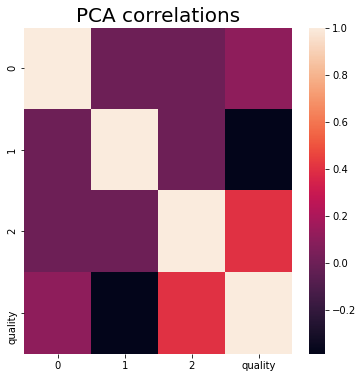

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data = principalComponents)
principalDf['quality'] = data['quality']
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_title("PCA correlations", fontsize = 20)
sns.heatmap(principalDf.corr())
principalDf.corr()

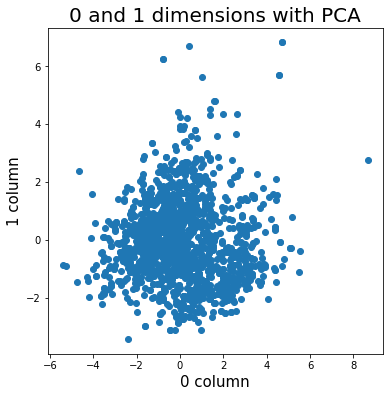

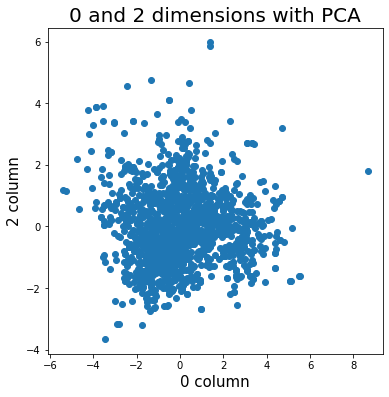

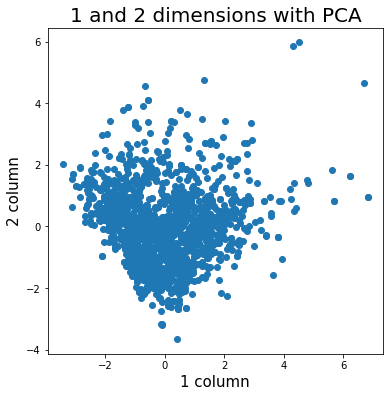

In [30]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('1 column', fontsize=15)
ax1.set_xlabel('0 column', fontsize=15)
ax1.set_title('0 and 1 dimensions with PCA', fontsize=20)
plt.scatter(principalDf[0], principalDf[1])
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('2 column', fontsize=15)
ax1.set_xlabel('0 column', fontsize=15)
ax1.set_title('0 and 2 dimensions with PCA', fontsize=20)
plt.scatter(principalDf[0], principalDf[2])
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('2 column', fontsize=15)
ax1.set_xlabel('1 column', fontsize=15)
ax1.set_title('1 and 2 dimensions with PCA', fontsize=20)
plt.scatter(principalDf[1], principalDf[2])

,0,1,2,quality
0,1.000000e+00,7.340049e-17,1.907518e-16,-0.094163
1,7.340049e-17,1.000000e+00,1.133750e-15,-0.214992
2,1.907518e-16,1.133750e-15,1.000000e+00,0.515872
quality,-9.416341e-02,-2.149923e-01,5.158723e-01,1.000000


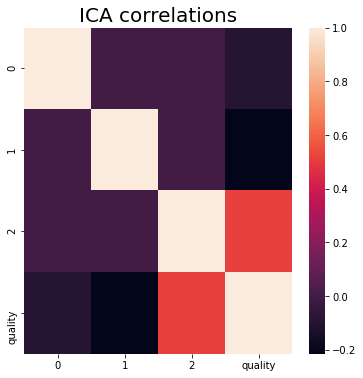

In [65]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=3)
principalComponents = ica.fit_transform(data_scaled)
principalDf = pd.DataFrame(data = principalComponents)
principalDf['quality'] = data['quality']
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_title("ICA correlations", fontsize = 20)
sns.heatmap(principalDf.corr())
principalDf.corr()

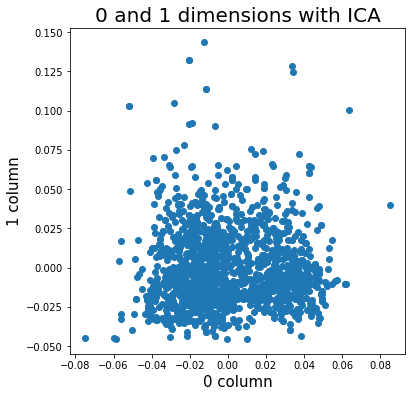

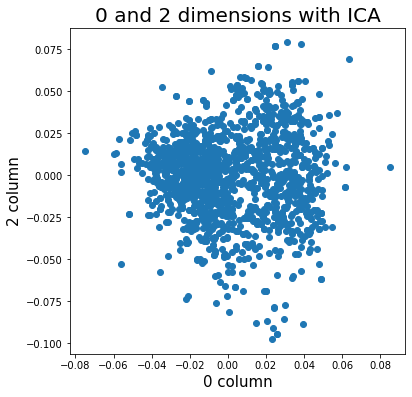

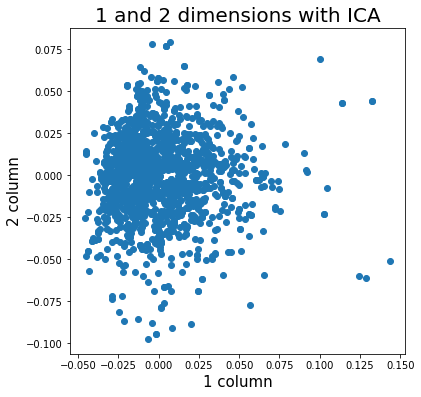

In [32]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('1 column', fontsize=15)
ax1.set_xlabel('0 column', fontsize=15)
ax1.set_title('0 and 1 dimensions with ICA', fontsize=20)
plt.scatter(principalDf[0], principalDf[1])
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('2 column', fontsize=15)
ax1.set_xlabel('0 column', fontsize=15)
ax1.set_title('0 and 2 dimensions with ICA', fontsize=20)
plt.scatter(principalDf[0], principalDf[2])
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('2 column', fontsize=15)
ax1.set_xlabel('1 column', fontsize=15)
ax1.set_title('1 and 2 dimensions with ICA', fontsize=20)
plt.scatter(principalDf[1], principalDf[2])

In [84]:
from sklearn.linear_model import LinearRegression
labels = np.array(data['quality'])
train_features, test_features, train_labels, test_labels = train_test_split(principalDf[2].to_frame(), labels, test_size = 0.25, random_state = 4)
lr = LinearRegression()
lr.fit(train_features, train_labels);
predictions = lr.predict(test_features)
errors = mean_squared_error(test_labels, predictions)
print('Mean Squared Error:', round(errors, 4))

Mean Squared Error: 0.4576


,0,1,2,quality
0,1.000000,-0.411275,-0.015467,0.088117
1,-0.411275,1.000000,0.048294,0.019851
2,-0.015467,0.048294,1.000000,-0.129090
quality,0.088117,0.019851,-0.129090,1.000000


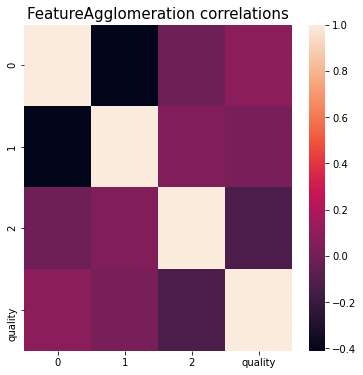

In [33]:
from sklearn.cluster import FeatureAgglomeration
agg = FeatureAgglomeration(n_clusters=3)
principalComponents = agg.fit_transform(data_scaled)
principalDf = pd.DataFrame(data = principalComponents)
principalDf['quality'] = data['quality']
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_title("FeatureAgglomeration correlations", fontsize = 15)
sns.heatmap(principalDf.corr())
principalDf.corr()

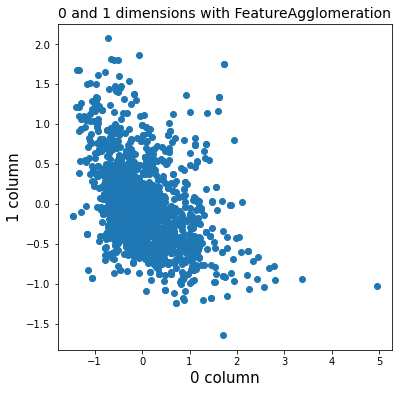

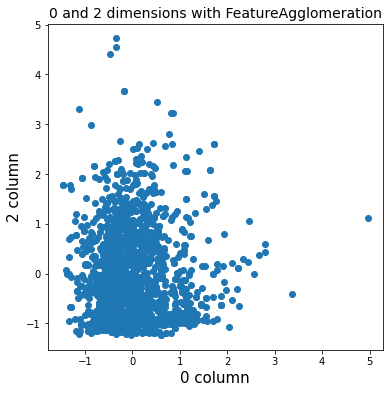

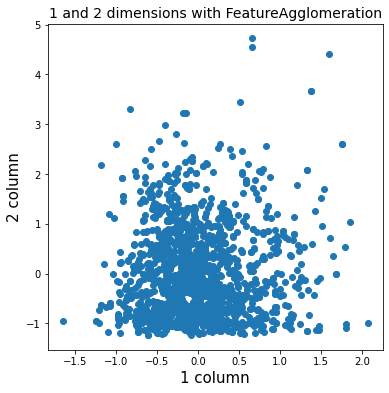

In [34]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('1 column', fontsize=15)
ax1.set_xlabel('0 column', fontsize=15)
ax1.set_title('0 and 1 dimensions with FeatureAgglomeration', fontsize=14)
plt.scatter(principalDf[0], principalDf[1])
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('2 column', fontsize=15)
ax1.set_xlabel('0 column', fontsize=15)
ax1.set_title('0 and 2 dimensions with FeatureAgglomeration', fontsize=14)
plt.scatter(principalDf[0], principalDf[2])
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.set_ylabel('2 column', fontsize=15)
ax1.set_xlabel('1 column', fontsize=15)
ax1.set_title('1 and 2 dimensions with FeatureAgglomeration', fontsize=14)
plt.scatter(principalDf[1], principalDf[2])

In [30]:
from sklearn.svm import SVR
from scipy.stats import zscore
red_wine_data = pd.read_csv("winequality-red.csv", delimiter=";")
white_wine_data = pd.read_csv("winequality-white.csv", delimiter=";")
frames = [red_wine_data, white_wine_data]
combined_wine_data = pd.concat(frames)
table = pd.DataFrame()

red_svr = SVR(kernel='linear')
white_svr = SVR(kernel='linear')
combined_svr = SVR(kernel='linear')

red_labels = np.array(red_wine_data['quality'])
red_without_quality= red_wine_data.drop('quality', axis = 1).apply(zscore)
red_feature_list = list(red_without_quality.columns)
red_train_features, red_test_features, red_train_labels, red_test_labels = train_test_split(red_without_quality, red_labels, test_size = 0.25, random_state = 4)

white_labels = np.array(white_wine_data['quality'])
white_without_quality= white_wine_data.drop('quality', axis = 1).apply(zscore)
white_feature_list = list(white_without_quality.columns)
white_train_features, white_test_features, white_train_labels, white_test_labels = train_test_split(white_without_quality, white_labels, test_size = 0.25, random_state = 4)

combined_labels = np.array(combined_wine_data['quality'])
combined_without_quality= combined_wine_data.drop('quality', axis = 1).apply(zscore)
combined_feature_list = list(data_without_quality.columns)
combined_train_features, combined_test_features, combined_train_labels, combined_test_labels = train_test_split(combined_without_quality, combined_labels, test_size = 0.25, random_state = 4)

In [31]:
table['column'] = combined_without_quality.columns.values

red_svr.fit(red_train_features, red_train_labels)
table['Red'] = red_svr.coef_[0]

white_svr.fit(white_train_features, white_train_labels);
table['White'] = white_svr.coef_[0]

combined_svr.fit(combined_train_features, combined_train_labels);
table['Combined'] = combined_svr.coef_[0]

table

,column,Red,White,Combined
0,fixed acidity,0.150565,0.076599,0.137439
1,volatile acidity,-0.155382,-0.195880,-0.223093
2,citric acid,-0.053178,0.001411,-0.020534
3,residual sugar,0.073620,0.426600,0.223274
4,chlorides,-0.088719,-0.024377,-0.027693
5,free sulfur dioxide,0.041945,0.082261,0.124542
6,total sulfur dioxide,-0.101893,-0.026538,-0.172300
7,density,-0.095400,-0.502542,-0.182636
8,pH,-0.017954,0.145311,0.098537
9,sulphates,0.200631,0.097236,0.125351


In [63]:
from sklearn.decomposition import PCA
red_wine_data = pd.read_csv("winequality-red.csv", delimiter=";")
white_wine_data = pd.read_csv("winequality-white.csv", delimiter=";")
frames = [red_wine_data, white_wine_data]
combined_wine_data = pd.concat(frames)
table_pca = pd.DataFrame()
red_wine_data_normalized = red_wine_data.apply(zscore)
white_wine_data_normalized = white_wine_data.apply(zscore)
combined_wine_data_normalized = combined_wine_data.apply(zscore)

red_pca = PCA(n_components=1)
white_pca = PCA(n_components=1)
combined_pca = PCA(n_components=1)

In [66]:

table_pca['column'] = combined_wine_data_normalized.columns.values

red_pca.fit(red_wine_data_normalized)
table_pca['Red'] = red_pca.components_[0]

white_pca.fit(white_wine_data_normalized);
table_pca['White'] = white_pca.components_[0]

combined_pca.fit(combined_wine_data_normalized);
table_pca['Combined'] = combined_pca.components_[0]

table_pca

,column,Red,White,Combined
0,fixed acidity,0.487883,0.156904,-0.256929
1,volatile acidity,-0.265129,0.024287,-0.394931
2,citric acid,0.473335,0.132944,0.146461
3,residual sugar,0.139154,0.406053,0.318905
4,chlorides,0.197427,0.217544,-0.313450
5,free sulfur dioxide,-0.045881,0.274719,0.422691
6,total sulfur dioxide,0.004067,0.390441,0.474420
7,density,0.370301,0.501296,-0.092438
8,pH,-0.432721,-0.130037,-0.208070
9,sulphates,0.254535,0.033642,-0.299852


In [84]:
from statsmodels.stats.weightstats import ztest
ztest(table['Red'], table['White'])[1]

0.9876913996672747

In [85]:
ztest(table['Red'], table['Combined'])[1]

0.8497307688049237

In [86]:
ztest(table['White'], table['Combined'])[1]

0.893672967492477

In [93]:
ztest(table_pca['Red'], table_pca['White'])[1]

0.9328818608237669

In [91]:
ztest(table_pca['Red'], table_pca['Combined'])[1]

0.32843546079150376

In [92]:
ztest(table_pca['White'], table_pca['Combined'])[1]

0.28680313080159314